In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('../datasets/processed/df_interpretacion.csv')


# Análisis de sobre/subestimación


<Figure size 1400x600 with 0 Axes>

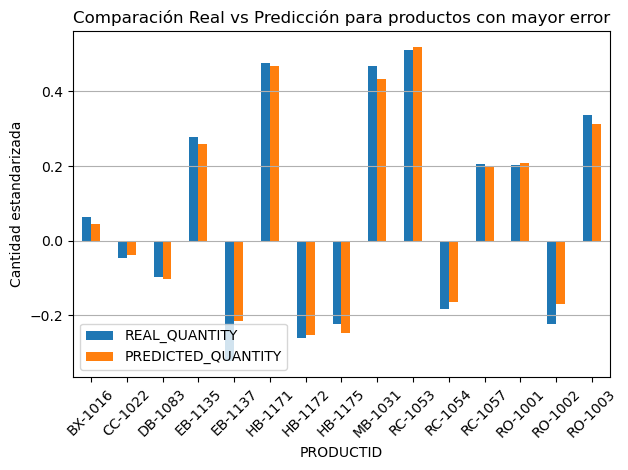

In [19]:

df['ERROR'] = df['REAL_QUANTITY'] - df['PREDICTED_QUANTITY']


top_productos_error = (
    df.groupby('PRODUCTID')['ERROR']
    .mean()
    .abs()
    .sort_values(ascending=False)
    .head(15)
    .index
)

df_top = df[df['PRODUCTID'].isin(top_productos_error)]


plt.figure(figsize=(14, 6))
df_top.groupby('PRODUCTID')[['REAL_QUANTITY', 'PREDICTED_QUANTITY']].mean().plot(kind='bar')
plt.title('Comparación Real vs Predicción para productos con mayor error')
plt.ylabel('Cantidad estandarizada')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



# Comparar errores por categoría de producto

C:\Users\jpare\AppData\Local\Temp\ipykernel_2288\811949889.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='PRODCATEGORYID', y='ERROR', palette='Set2')


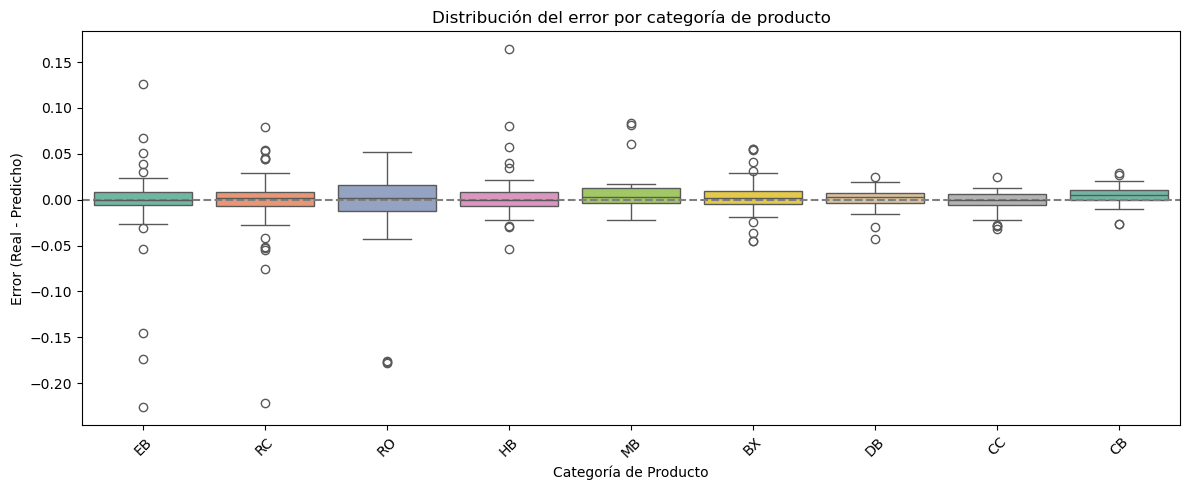

In [20]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='PRODCATEGORYID', y='ERROR', palette='Set2')
plt.axhline(0, linestyle='--', color='gray')
plt.title('Distribución del error por categoría de producto')
plt.ylabel('Error (Real - Predicho)')
plt.xlabel('Categoría de Producto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
df.head()

,PRODUCTID,PRICE_UNITARIO,ANIO,INGRESO_TOTAL,PRODCATEGORYID,SEMANA,DIA_SEMANA_Monday,DIA_SEMANA_Saturday,DIA_SEMANA_Sunday,DIA_SEMANA_Thursday,...,MES_SIN,MES_COS,DIA_ANIO_SIN,DIA_ANIO_COS,REAL_QUANTITY,PREDICTED_QUANTITY,ERROR_ABSOLUTO,ERROR,REAL_STD,PRED_STD
0,EB-1137,3.262145,2019,2.902247,EB,2019-04-08,False,True,False,False,...,8.660254e-01,-0.500000,0.979614,-0.200891,0.163117,0.389260,0.226143,-0.226143,0.169595,0.399097
1,RC-1054,1.955064,2018,1.332965,RC,2018-10-15,False,False,False,False,...,-8.660254e-01,0.500000,-0.965740,0.259512,-0.183847,0.038119,0.221966,-0.221966,-0.182499,0.042412
2,RO-1002,-0.663454,2018,-0.508782,RO,2018-06-11,False,False,True,False,...,1.224647e-16,-1.000000,0.247022,-0.969010,0.163117,0.340887,0.177770,-0.177770,0.169595,0.349961
3,RO-1002,-0.663454,2019,-0.508782,RO,2019-01-21,False,False,False,False,...,5.000000e-01,0.866025,0.385663,0.922640,0.163117,0.340231,0.177115,-0.177115,0.169595,0.349295
4,RO-1002,-0.663454,2019,-0.508782,RO,2019-05-20,False,False,False,False,...,5.000000e-01,-0.866025,0.615285,-0.788305,0.163117,0.338569,0.175453,-0.175453,0.169595,0.347606


### Gráficos

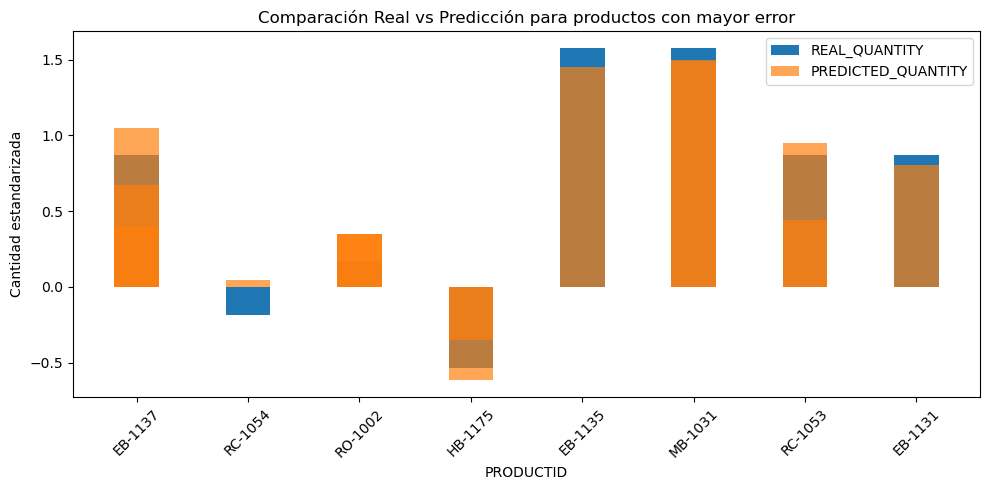

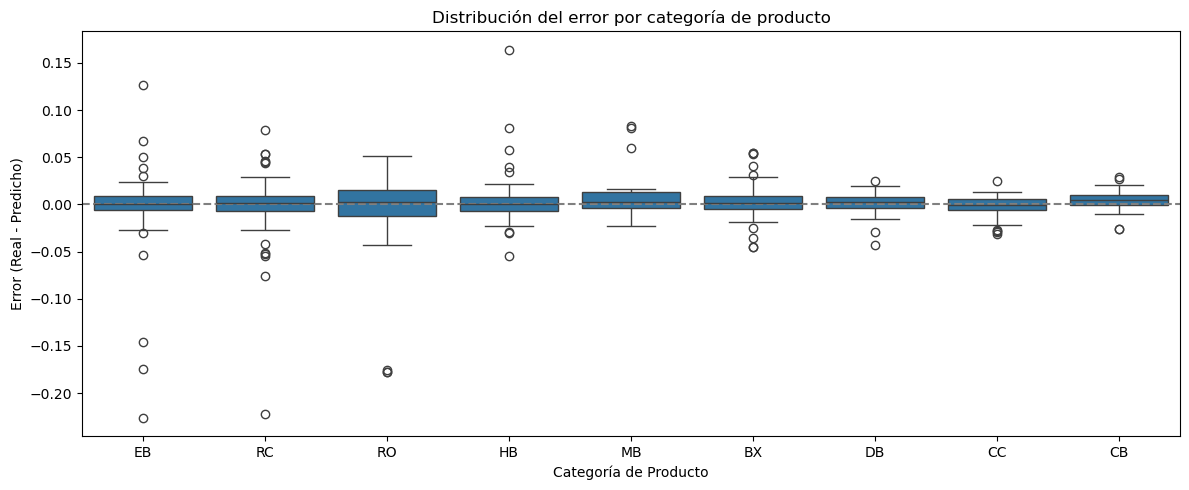

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df['ERROR'] = df['REAL_QUANTITY'] - df['PREDICTED_QUANTITY']


scaler = StandardScaler()
df[['REAL_STD', 'PRED_STD']] = scaler.fit_transform(df[['REAL_QUANTITY', 'PREDICTED_QUANTITY']])


top_errores = df.sort_values('ERROR_ABSOLUTO', ascending=False).head(15)


plt.figure(figsize=(10, 5))
x = top_errores['PRODUCTID']
plt.bar(x, top_errores['REAL_STD'], width=0.4, label='REAL_QUANTITY')
plt.bar(x, top_errores['PRED_STD'], width=0.4, label='PREDICTED_QUANTITY', alpha=0.7)
plt.title('Comparación Real vs Predicción para productos con mayor error')
plt.ylabel('Cantidad estandarizada')
plt.xlabel('PRODUCTID')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='PRODCATEGORYID', y='ERROR')
plt.title('Distribución del error por categoría de producto')
plt.ylabel('Error (Real - Predicho)')
plt.xlabel('Categoría de Producto')
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


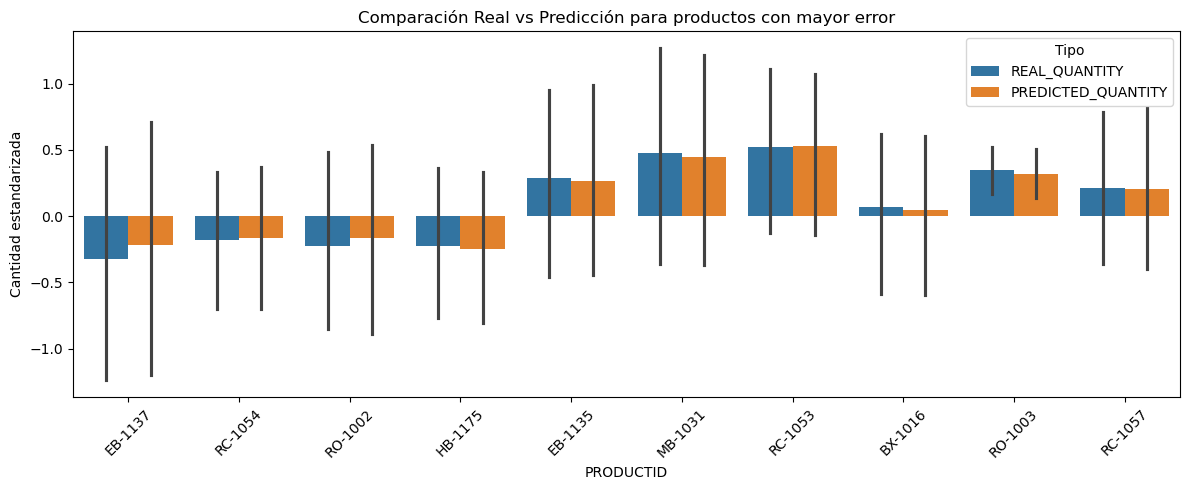

In [ ]:
df['ERROR'] = df['REAL_QUANTITY'] - df['PREDICTED_QUANTITY']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_plot = df[['PRODUCTID', 'REAL_QUANTITY', 'PREDICTED_QUANTITY']].copy()
df_plot[['REAL_QUANTITY', 'PREDICTED_QUANTITY']] = scaler.fit_transform(df_plot[['REAL_QUANTITY', 'PREDICTED_QUANTITY']])

df_plot['ERROR_ABSOLUTO'] = abs(df['ERROR'])

top_errores = df_plot.groupby('PRODUCTID')['ERROR_ABSOLUTO'].mean().sort_values(ascending=False).head(10).index
df_top = df_plot[df_plot['PRODUCTID'].isin(top_errores)]

df_top_melted = df_top.melt(id_vars='PRODUCTID',
                            value_vars=['REAL_QUANTITY', 'PREDICTED_QUANTITY'],
                            var_name='Tipo', value_name='Cantidad')

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.barplot(data=df_top_melted, x='PRODUCTID', y='Cantidad', hue='Tipo')
plt.title("Comparación Real vs Predicción para productos con mayor error")
plt.ylabel("Cantidad estandarizada")
plt.xlabel("PRODUCTID")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



C:\Users\jpare\AppData\Local\Temp\ipykernel_2288\3844194550.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='PRODCATEGORYID', y='ERROR', palette="Set2")


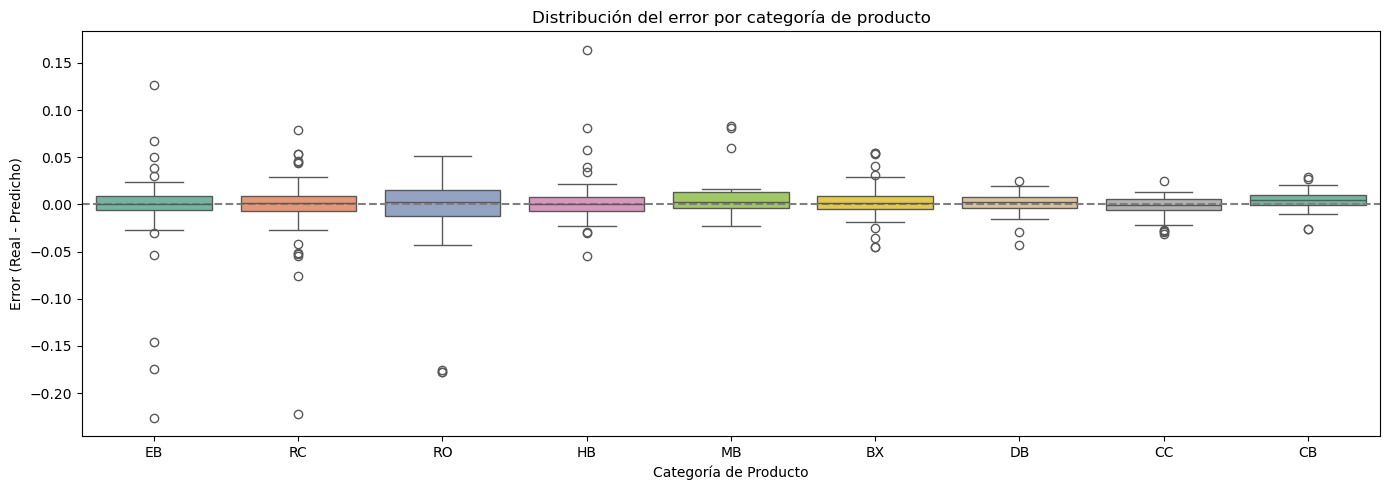

In [5]:
plt.figure(figsize=(14, 5))
sns.boxplot(data=df, x='PRODCATEGORYID', y='ERROR', palette="Set2")
plt.axhline(0, color='gray', linestyle='--')
plt.title("Distribución del error por categoría de producto")
plt.xlabel("Categoría de Producto")
plt.ylabel("Error (Real - Predicho)")
plt.tight_layout()
plt.show()

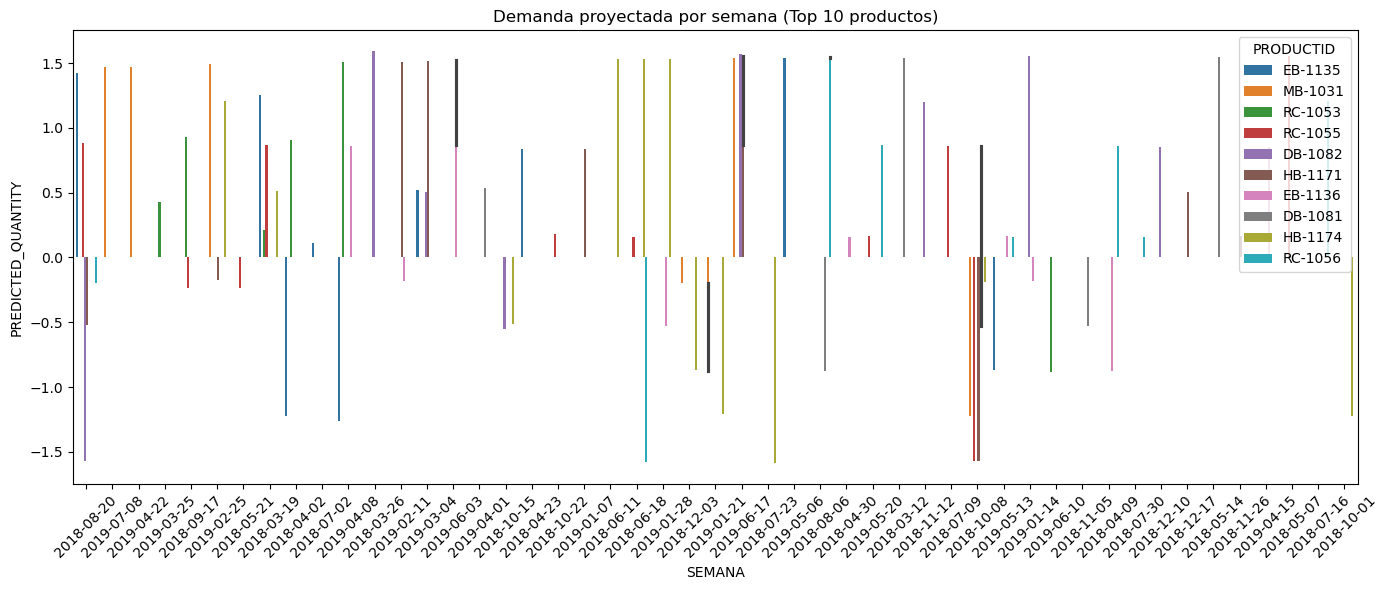

In [ ]:
top_productos = df.groupby('PRODUCTID')['PREDICTED_QUANTITY'].sum().nlargest(10).index

df_top = df[df['PRODUCTID'].isin(top_productos)]

plt.figure(figsize=(14, 6))
sns.barplot(data=df_top, x='SEMANA', y='PREDICTED_QUANTITY', hue='PRODUCTID')
plt.title("Demanda proyectada por semana (Top 10 productos)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df['SEMANA'] = pd.to_datetime(df['SEMANA']) 
df['SEMANA'] = df['SEMANA'].dt.to_period('W').astype(str) 


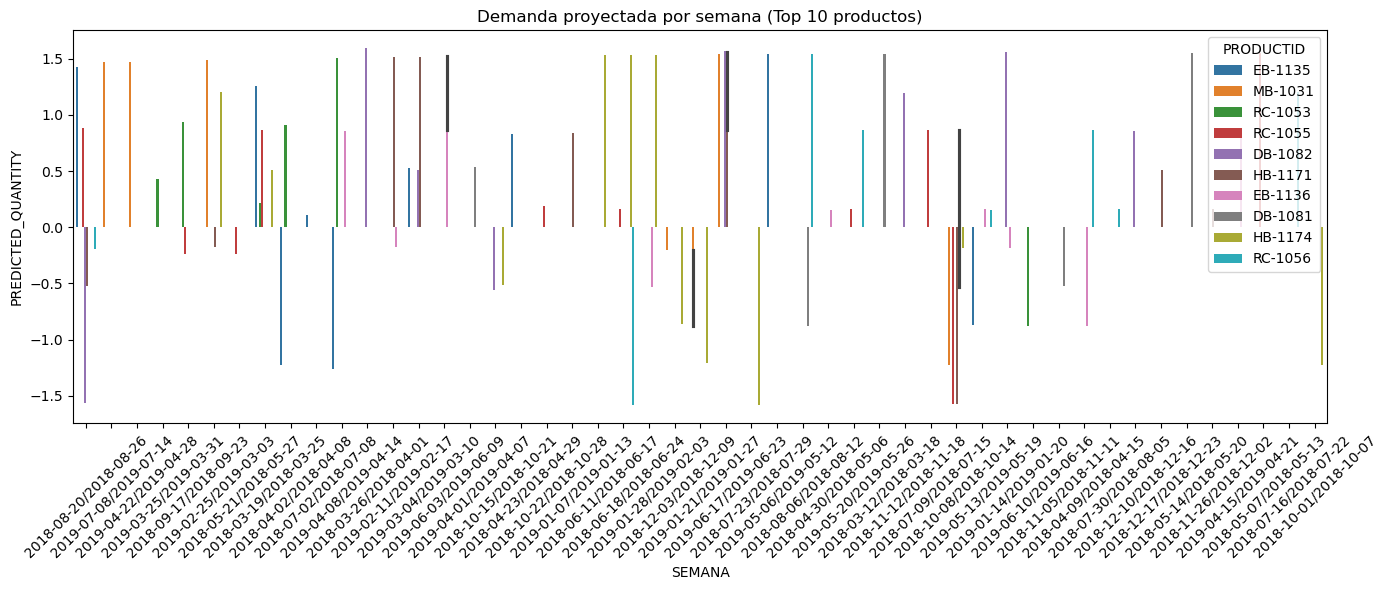

In [ ]:
top_productos = df.groupby('PRODUCTID')['PREDICTED_QUANTITY'].sum().nlargest(10).index

df_top = df[df['PRODUCTID'].isin(top_productos)]

plt.figure(figsize=(14, 6))
sns.barplot(data=df_top, x='SEMANA', y='PREDICTED_QUANTITY', hue='PRODUCTID')
plt.title("Demanda proyectada por semana (Top 10 productos)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


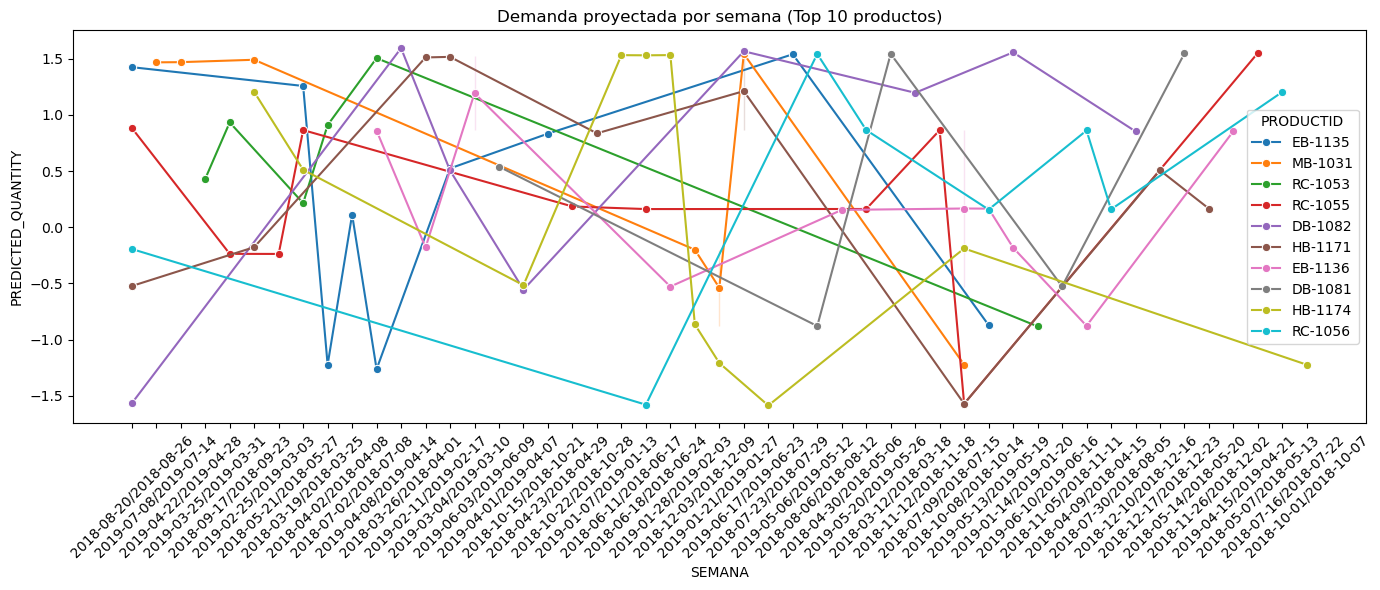

In [11]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_top, x='SEMANA', y='PREDICTED_QUANTITY', hue='PRODUCTID', marker='o')
plt.title("Demanda proyectada por semana (Top 10 productos)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\jpare\AppData\Local\Temp\ipykernel_2288\1401399323.py:22: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jpare\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


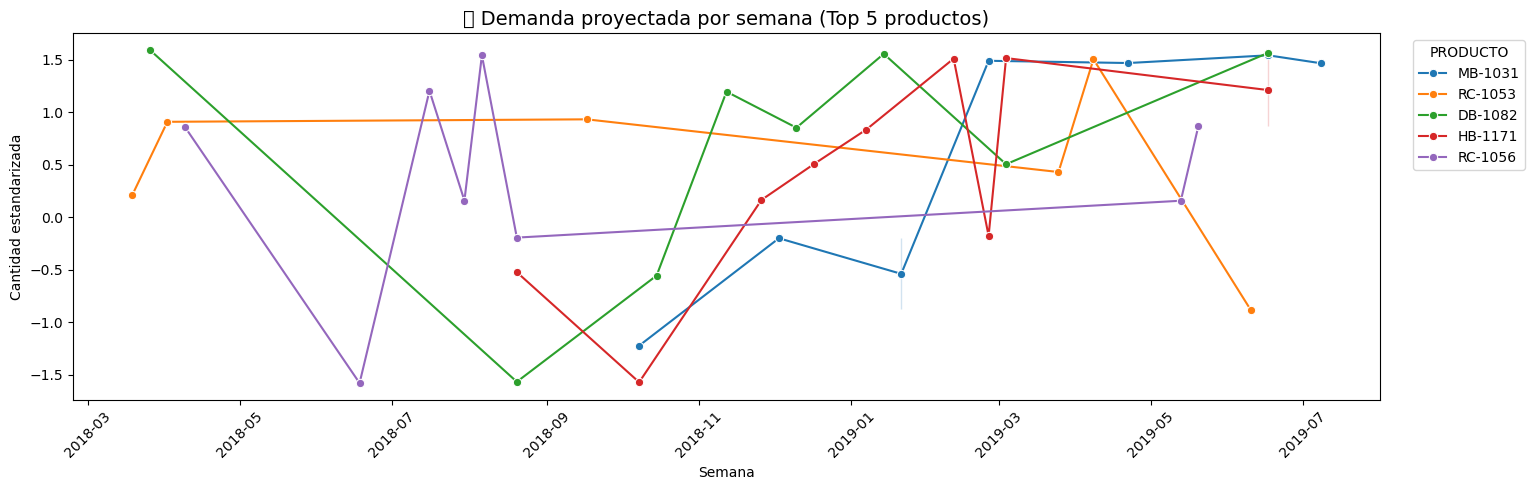

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df['SEMANA_INICIO'] = df['SEMANA'].str.split('/').str[0]
df['SEMANA_INICIO'] = pd.to_datetime(df['SEMANA_INICIO'])


top_productos = df.groupby('PRODUCTID')['PREDICTED_QUANTITY'].sum().nlargest(5).index


df_top = df[df['PRODUCTID'].isin(top_productos)]


plt.figure(figsize=(14, 5))
sns.lineplot(data=df_top, x='SEMANA_INICIO', y='PREDICTED_QUANTITY', hue='PRODUCTID', marker='o')
plt.title("📦 Demanda proyectada por semana (Top 5 productos)", fontsize=14)
plt.xlabel("Semana")
plt.ylabel("Cantidad estandarizada")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='PRODUCTO', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


### ...
